# Teoria da Computação: Máquinas de Turing - Linguagens Recursivamente Enumeráveis
> *Autor: Davi Romero de Vasconcelos, daviromero@ufc.br, Universidade Federal do Ceará, Campus de Quixadá, Outubro de 2021*.
> *(Última atualização 17/11/2021)*

Este material foi preparado para a disciplina de Teoria da Computação com a finalidade de apresentar os conceitos básicos das Linguagens Recursivamente Enumerávies, utilizando a Linguagem de Programação Python. Para cada seção é apresentado um link (no título da seção) com um vídeo explicando o conteúdo a ser abordado. Uma Playlist com todo o conteúdo de Linguagem Recursivamente Enumerável está disponível no [YouTube](https://youtube.com/playlist?list=PLfOnKvd6pFiphK7agm3jEi2DE9DsQOg4l).

A célula a abaixo contém a implementação em Python de Máquinas de Turing e algumas de suas variantes. Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Basta acompanhar os exemplos e experimentar construir seus próprios modelos.
>*Execute a célula abaixo (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as classes implementadas.*


In [1]:
!pip install teocomp -q
from teocomp.mt import MT
from teocomp.mt_ndmf import MTNDMF, S_BLK_BOX, S_BLK, S_BLK_U
from teocomp.mt_nd import MTND
from teocomp.mt_mf import MTMF

# [Linguagem Recursivamente Enumerável - Máquina de Turing](https://youtu.be/2J1XrIdmETs)

Uma **Linguagem Recursivamente Enumerável** é definida por uma  **Máquina de Turing** que consiste de:
- Um **controle finito**, que pode se encontrar em qualquer estado. 
- Uma **fita infinita à direita e à esquerda dividida em células**.
- Cada **célula** da fita pode conter qualquer **símbolo** e existe um símbolo de branco.
- Uma **cabeça da fita** que sempre fica posicionada em uma célula. 
- Inicialmente, a fita contém a entrada e brancos nas demais células e a cabeça encontra-se na célula mais à esquerda da entrada.
- Uma **função de transição (ou movimento)** é uma função do estado e do símbolo de fita lido que retorna o próximo estado, grava um símbolo na célula da fita e move a fita à direita ou à esquerda.
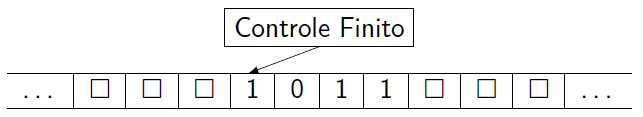

Formalmente, uma **Máquina de Turing (MT)** é definido por $M=\langle Q, \Sigma,\Gamma, \delta, q_0,\Box, F\rangle$, onde:
- $Q$ é um conjunto finito de **estados** do controle finito.
- $\Sigma$ é um conjunto finito de **entradas**
- $\Gamma$ é um conjunto finito de **símbolos de fita** ($\Sigma\subseteq\Gamma$).
- $q_0$ é um **estado inicial** ($q_0\in Q$)
- $\Box$ é um **símbolo de branco** ($\Box\in\Gamma$ e $\Box\not\in\Sigma$)
- $F$ é um conjunto de **estados finais (ou de aceitação)** ($F\subseteq Q$)
- $\delta: Q\times\Gamma\rightarrow Q\times\Gamma\times\{L,R\}$ é uma **função parcial de transição** que toma como argumento um estado e um símbolo da fita, e retorna um estado, um símbolo gravado na fita e o movimento da cabeça da fita que pode ser $L$ para esquerda (*Left*) e $R$ para a direita (*Right*).

Vejamos um exemplo.
Seja Linguagem $L^+_{0^n1^n}=\{0^n1^n|n\geq 1 \}$. Defina $MT^+_{L_{0n1n}}$ um MT que reconhece $L^+_{0^n1^n}$:
- $Q=\{q_0,q_1,q_2,q_3,q_4\}$
- $\Sigma =\{0,1\}$ e $\Gamma = \{0,1,X,Y,\Box\}$
- $q_0$ é o estado inicial.
- $F=\{q_4\}$
- $\delta(q_0,0) = \langle q_1, X, R\rangle \qquad \delta(q_1,0) = \langle q_1, 0, R\rangle $
  
  $ \delta(q_1,Y) = \langle q_1, Y, R\rangle \qquad \delta(q_1,1) = \langle q_2, Y, L\rangle$ 
  
  $\delta(q_2,0) = \langle q_2, 0, L\rangle \qquad \delta(q_2,Y) = \langle q_2, Y, L\rangle$
  
  $\delta(q_2,X) = \langle q_0, X, R\rangle \qquad \delta(q_0,Y) = \langle q_3, Y, R\rangle $
  
  $\delta(q_3,Y) = \langle q_3, Y, R\rangle \qquad \delta(q_3,\Box) = \langle q_4, \Box, L\rangle $


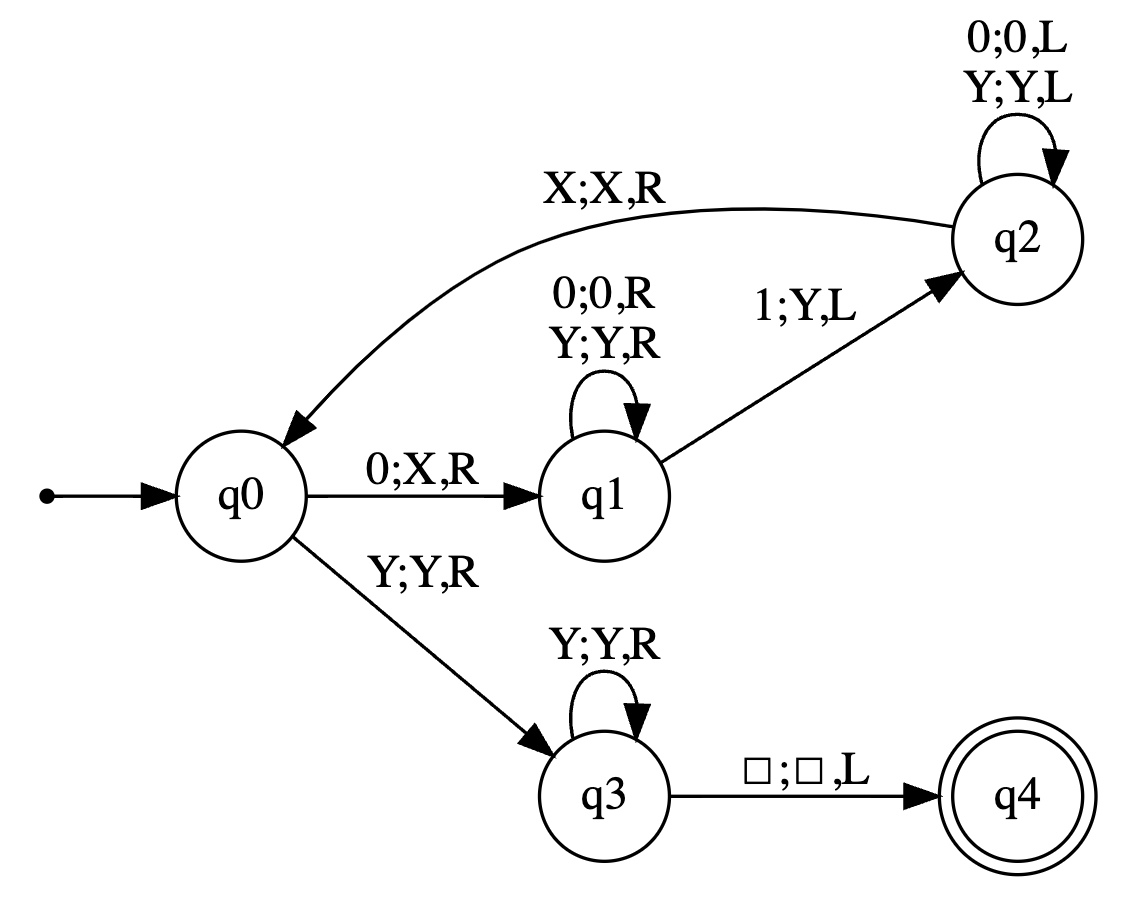

In [ ]:
print("A Linguagem L+0n1n={0n1n|n≥1}\n")
Q = {'q0','q1','q2','q3','q4'}
Sigma = {'0','1'}
blank=S_BLK_BOX #='☐' 
Gamma = {'0','1','X','Y',S_BLK_BOX}
delta = {('q0','0'):('q1','X','R'), ('q1','0'):('q1','0','R'),
         ('q1','Y'):('q1','Y','R'), ('q1','1'):('q2','Y','L'),
         ('q2','0'):('q2','0','L'), ('q2','Y'):('q2','Y','L'),
         ('q2','X'):('q0','X','R'), ('q0','Y'):('q3','Y','R'),
         ('q3','Y'):('q3','Y','R'), ('q3',S_BLK_BOX):('q4',S_BLK_BOX,'L')}
q0 = 'q0'
F ={'q4'} 
M_0n1n = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_0n1n.visualizar()

## [Descrição Instantânea de uma Máquina de Turing](https://youtu.be/T6_x_R5ekXw)

Para definirmos uma computação, precisamos definir a **Descrição Instantânea (ID)** de uma MT que processa uma entrada, levando-se em consideração o conteúdo da fita. 
 
 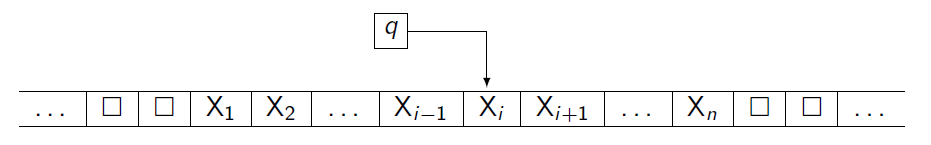

Representamos a ID de uma MT como $X_1X_2\ldots X_{i-1}q X_i\ldots X_n$, onde
- $q$ é o estado da MT.
- $X_1X_2\ldots X_{i-1}X_i\ldots X_n$ é a parte da fita entre o não-branco mais à esquerda e o não-branco mais à direita.
- A cabeça da fita está varrendo o i-ésimo símbolo a partir da esquerda.

Definimos uma **dedução** entre duas descrições instantâneas de uma MT como

\begin{equation*}
X_1X_2\ldots X_{i-1} {\color{blue}{q X_i}}X_{i+1}\ldots X_n\vdash X_1X_2\ldots X_{i-1}  {\color{blue}{Yp}}X_{i+1}\ldots X_n,\textrm{ se }{\color{blue}{\delta(q,X_i)}}={\color{blue}{\langle p,Y,R\rangle}}\textrm{, e}
\end{equation*}

\begin{equation*}
X_1X_2\ldots {\color{blue}{X_{i-1}q X_i}}X_{i+1}\ldots X_n\vdash X_1X_2\ldots {\color{blue}{pX_{i-1} Y}}X_{i+1}\ldots X_n,\textrm{ se }{\color{blue}{\delta(q,X_i)}}={\color{blue}{\langle p,Y,L\rangle}}
\end{equation*}


Por fim, definimos $\vdash^*$ como uma sequência de zero ou mais deduções como segue:
- $I\vdash^* I$, para qualquer ID $I$.
- Se existe um ID $K$ tal que $I\vdash K$ e $K\vdash^* J$, então $I\vdash^* J$

In [ ]:
print("A dedução da palavra 000111 na máquina de Turing da Linguagem L+0n1n={0n1n|n≥1}\n")
M_0n1n.aceita("000111",show_steps=True)

In [ ]:
casos_testes ={
    '':False,
    '01':True,
    '0011': True,
    '011':False,
    '001':False
}
M_0n1n.display_resultados(casos_testes)

## [Linguagem Recursivamente Enumerável](https://youtu.be/QuIp3Ffx0yE)
Seja uma MT $M=M=\langle Q, \Sigma,\Gamma, \delta, q_0,\Box, F\rangle$. Dizemos que $L(M)$ denota a **Linguagem Recursivamente Enumerável** e é definida por:

\begin{align*}
L(M) & =&  \{w |~q_0w~\vdash^{*} ~\alpha~p~\beta \textrm{ e }p\in F\}
\end{align*}

Dizemos que uma Linguagem $L$ é **Recursiva** se $L=L(M)$  para alguma máquina de Turing $M$ tal que:
- Se $w \in L$, então $M$ aceita (e portanto pára).
- Se $w \not\in L$, então $M$ pára, embora nunca entre em um estado de aceitação.


In [ ]:
# Visualizar a computação da palavra 000111 na MT da Linguagem L+0n1n={0n1n|n≥1}
print("A simulação da computação da palavra 000111 na máquina de Turing da Linguagem L+0n1n={0n1n|n≥1}\n")
M_0n1n.simular("000111")

### Atividades em Sala de Aula

In [ ]:
#@title 1. Faça uma MT que começa em 0
print("1. Faça uma MT que começa em 0")
Q = {...}
Sigma = {...}
Gamma = {...}
delta = {...}
q0 = ...
blank=...
F=...
M_ini_0 = MT(Q,Sigma,Gamma,delta,q0,blank,F)

M_ini_0.simular("001")

In [ ]:
#@title 2. Faça uma MT que começa em 01
print("2. Faça uma MT que começa em 01")
Q = {...}
Sigma = {...}
Gamma = {...}
delta = {...}
q0 = ...
blank=...
F=...
M_ini_01 = MT(Q,Sigma,Gamma,delta,q0,blank,F)

M_ini_01.simular("01111")

In [ ]:
#@title 3. Faça uma MT que termina em 0
print("3. Faça uma MT que termina em 0")
Q = {...}
Sigma = {...}
Gamma = {...}
delta = {...}
q0 = ...
blank=...
F=...
M_termina_0 = MT(Q,Sigma,Gamma,delta,q0,blank,F)

M_termina_0.simular("0110")

In [ ]:
#@title 4. Faça uma MT que termina em 0
print("4. Faça uma MT que termina em 0")
Q = {...}
Sigma = {...}
Gamma = {...}
delta = {...}
q0 = ...
blank=...
F=...
M_termina_01 = MT(Q,Sigma,Gamma,delta,q0,blank,F)

M_termina_01.simular("01101")

In [ ]:
#@title 5. Faça uma MT que contém em 01
print("5. Faça uma MT que contém em 01")
Q = {...}
Sigma = {...}
Gamma = {...}
delta = {...}
q0 = ...
blank=...
F=...
M_contem_01 = MT(Q,Sigma,Gamma,delta,q0,blank,F)

M_contem_01.simular("1101")

## [Técnicas de Programação em MT - Armazenamento no Estado](https://youtu.be/zlGTugEbZy0)
Podemos usar o controle (estado) para representar uma posição no programa e também uma quantidade finita de dados. Pensamos em um estado como um tupla.

  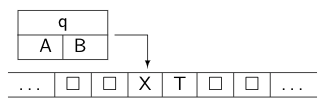

Vejamos um exemplo:

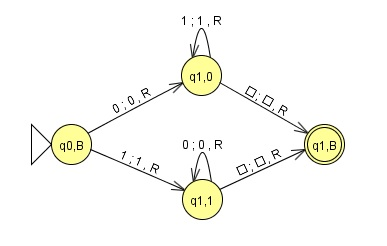

In [ ]:
Q = {...}
Sigma = {...}
Gamma = {...}
delta = {...}
q0 = ...
blank=S_BLK #=' ' 
F={{...}}
M_estado = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_estado.visualizar()

In [ ]:
M_estado.aceita("0111",show_steps=True)

## [Técnicas de Programação em Máquina de Turing - Várias Trilhas](https://youtu.be/oWbzNUXyN3A)
- Imagine a fita composta de várias trilhas e cada trilha pode conter um símbolo.
- O alfabeto da fita consiste em tuplas com um componente em cada trilha.
- O movimento da cabeça da fita altera toda a entrada (tupla) das trilhas.

\begin{equation*}
\delta(\langle q, A,B\rangle, \langle X,Y,Z\rangle)=\langle \langle q',A',B'\rangle,\langle X',Y',Z'\rangle,R\rangle 
\end{equation*}

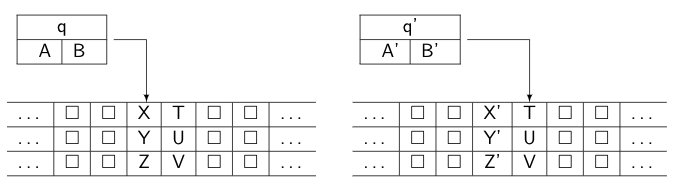


## [Técnicas de Programação em MT - Sub-rotinas](https://youtu.be/YErDra-QYBo)
Podemos definir sub-rotinas em MTs para facilitar a construção de MTs. Por exemplo, podemos definir uma função copiar para definir a multiplicação: $0^m10^n1\rightarrow 0^{mn}$.

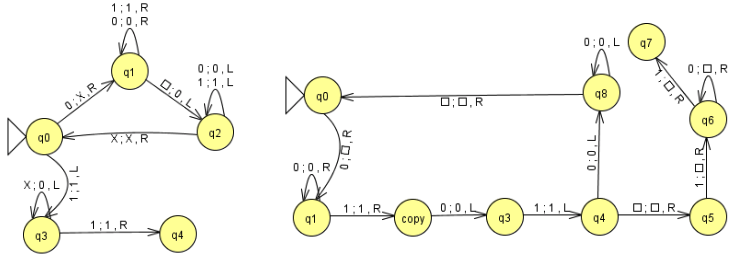

In [ ]:
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}
M_copy = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_copy.visualizar()

In [ ]:
M_copy.simular_id_inicial("1","001")

In [ ]:
M_copy.aceita(input_string="00010001",show_steps=True)

In [ ]:
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta  ={...}
MTs = {"copy":M_copy}
M_mult = MT(Q,Sigma,Gamma,delta,q0,blank, F,MTs=MTs)
M_mult.visualizar()

In [ ]:

M_mult.aceita(input_string="0001001",show_steps=True)


In [ ]:
#M_mult.visualizar_computacao(input_string="0001001")
M_mult.simular("000100")

## [Extensões de Máquinas de Turing - Movimento Vazio](https://youtu.be/3lqdTnJOjHk)

Podemos considerar uma máquina de Turing que ao escrever um símbolo na fita, não faz movimento, i.e., permanece parado (**Stationary**). Para tanto, alteramos a função de transição para $\delta: Q\times\Gamma\rightarrow Q\times\Gamma\times\{L,R,S\}$, adicionando a seguinte regra:

\begin{equation*}X_1X_2\ldots X_{i-1}{\color{blue}{q X_i}}X_{i+1}\ldots X_n\vdash X_1X_2\ldots X_{i-1} {\color{blue}{p Y}}X_{i+1}\ldots X_n,\textrm{ se }{\color{blue}{\delta(q,X_i)=\langle p,Y,S\rangle}}
\end{equation*}
>**Teorema:** Uma linguagem que pode ser reconhecida por máquina de MT com Movimento Vazio pode ser reconhecida por uma Máquina de Turing
>
>**Prova:** Substitua cada dedução de movimento parado, pelos seguintes movimentos na MT:
> \begin{equation*}
X_1X_2\ldots X_{i-1}{\color{blue}{q X_i}}X_{i+1}\ldots X_n\vdash X_1X_2\ldots X_{i-1} {\color{blue}{Yp}}X_{i+1}\ldots X_n,\textrm{ se }{\color{blue}{\delta(q,X_i)=\langle p,Y,R\rangle}}
\end{equation*}
>
> \begin{equation*}
X_1X_2\ldots X_{i-1} {\color{blue}{YpX_{i+1}}}\ldots X_n\vdash X_1X_2\ldots X_{i-1} {\color{blue}{pYX_{i+1}}}\ldots X_n,\textrm{ se }{\color{blue}{\delta(p,X_{i+1})=\langle p,X_{i+1},L\rangle}}
\end{equation*}


## [Extensões de Máquinas de Turing - Várias Fitas](https://youtu.be/ZIHf5ZhZNX0)
Podemos estender uma Máquina de Turing (MT), para uma MT com Várias Fitas:
- A entrada é colocada na primeira fita.
- Todas as outras células de todas as fitas contém o branco.
- A cabeça da primeira fita está na extremidade à esquerda da entrada.
- Todas as outras cabeças das fitas estão em qualquer posição.
- Um movimento da MT de várias fitas depende do estado e do símbolo varrido por cada uma das cabeças da fita. Em um movimento, faz o seguinte:
  - O controle entra em um novo estado.
  - Em cada fita, um novo símbolo é escrito na célula varrida.
  - Cada uma das cabeças da fita faz um movimento, que pode ser para Esquerda (L), Direita (R) ou Parada (S).
\begin{equation*}
\delta: Q\times \Gamma^k\rightarrow Q\times \Gamma^k\times\{R,L,S\}^k
\end{equation*}

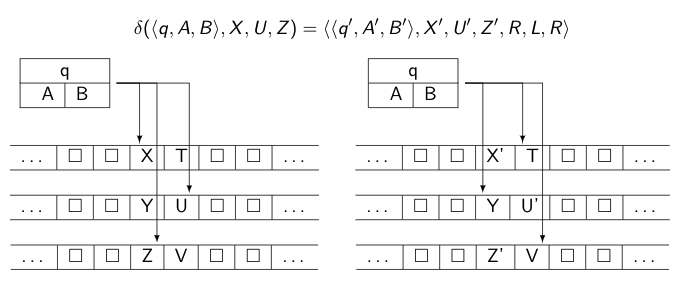

Vejamos um exemplo da Linguagem $L=\{w\#w\}$ utilizando apenas uma fita:

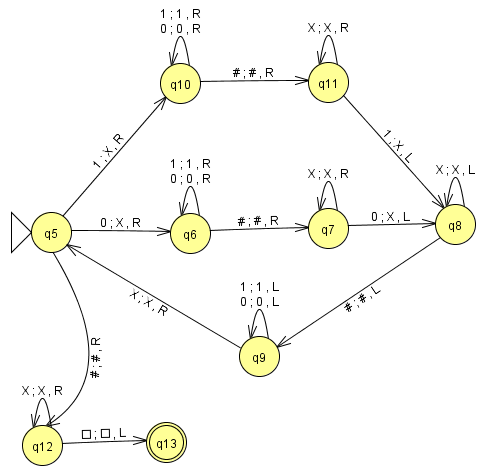


Agora, vejamos essa mesma linguagem $L=\{w\#w\}$ em uma máquina de Turign com duas fitas:

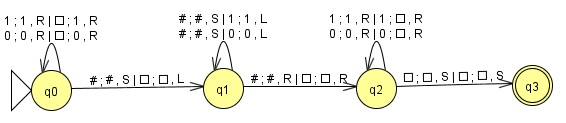



In [ ]:
print("Máquina de Turing com uma fita para a Linguagem Lw#w = {w#w}\n")

Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}
M_w_w = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_w_w.visualizar()

In [ ]:
print("A dedução da palavra 011#011 na Máquina de Turing com uma fita para a Linguagem Lw#w = {w#w}\n")
M_w_w.aceita("011#011",show_steps=True)

In [ ]:
print("A simulação da computação da palavra 011#011 na Máquina de Turing com uma fita para a Linguagem Lw#w = {w#w}\n")
M_w_w.simular("011#011")

In [ ]:
print("Máquina de Turing com 2 fitas para a Linguagem Lw#w = {w#w}\n")

Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}

M_MF_w_w = MTMF(Q,Sigma,Gamma,delta,q0,blank,F)
M_MF_w_w.visualizar()

In [ ]:
print("Dedução da palavra 001#011 na Máquina de Turing com 2 fitas para a Linguagem Lw#w = {w#w}\n")
M_MF_w_w.aceita("011#011",show_steps=True)

In [ ]:
print("Simulação da computação da palavra 001#011 na Máquina de Turing com 2 fitas para a Linguagem Lw#w = {w#w}\n")
M_MF_w_w.simular("011#011")

## [Extensões de Máquinas de Turing - Não Determinísmo](https://youtu.be/jbLL7PjvQOk)
Uma **Máquina de Turing Não-Determinística (MNT)** difere da versão determinística por permitir que a função de transição $\delta$ de estado $q$ e símbolo da fita $X$ retorne um conjunto de triplas $\{\langle q_1,Y_1, D_1\rangle,\ldots\langle q_n,Y_n, D_n\rangle\}$, i.e., $\delta:Q\times\Gamma\rightarrow 2^{Q\times\Gamma\times\{R,L,S\}}$

Por exemplo, a função $\delta(q_0,0)=\{\langle q_0,Y,R\rangle, \langle q_1,X,R\rangle \}$ 

A linguagem aceita por uma MNT M é definida de forma análoga aos outros mecanismos de não-determinismos (NFA ou PDA), i.e., M aceita uma entrada $w$ se existe uma sequência de escolhas de movimentos tal que levem de um ID inicial em um ID com um estado de aceitação.

Fazemos uma **busca em largura** para encontrarmos um ID com estado de aceitação.

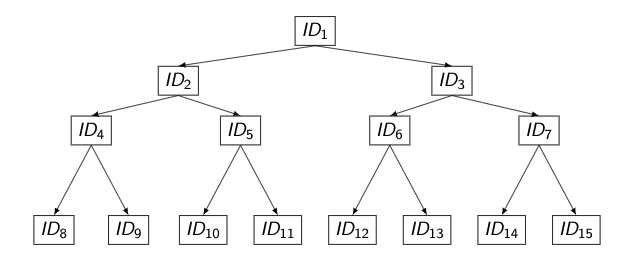

>**Teorema:** Se $M_N$ é um MT Não-Determinística, então existe uma MT Determinística $M_D$ tal que $L(M_N)=L(M_D)$. 
>
>**Prova:**
>$M_D$ será representada por uma MT de 2 fitas, na qual iremos armazenar na primeira fita uma sequência de ID's de $M_N$, separadas por $*$ e uma ID, a atual, marcada por $\overline{*}$, cujas ID's anteriores já foram processadas e as sucessivas serão exploradas. 
>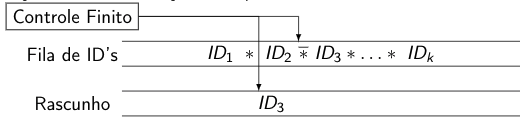
>
>Para processar cada $ID_i$, a $M_D$ faz o seguinte:
- $M_D$ examina o $ID_i$ e se este for um estado de aceitação, então $M_D$ aceita e pára.
- Se não for de aceitação, então $M_D$ faz uma cópia do ID na segunda fita e se tem $k$ transições para o simbolo da fita, então faz $k$ cópias da $ID_i$ ao final da sequência de ID's da primeira fita.
- $M_D$ modifica cada um das $k$ ID's de acordo com cada uma das $K$ escolhas de $M_N$ tem a partir de $ID_i$.
- $M_D$ retorna para a $ID_i$ atual, altera o símbolo $\overline{*}$ para $*$, movendo-o para a próximo ID à direita. Então repete todo o ciclo.

Vejamos a Máquina de Turing para Linguagem $L=\{ww\}$

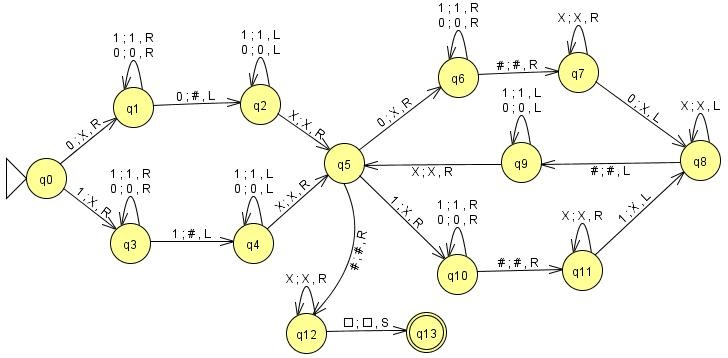


In [ ]:
print("Uma Máquina de Turing Não-Determinística para a Linguagem Lww = {ww}\n")
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}
M_ND_ww = MTND(Q,Sigma,Gamma,delta,q0,blank,F)
M_ND_ww.visualizar(highlightNonDeterministic=True)         


In [ ]:
print("Dedução da palavra 10011001 na Máquina de Turing Não-Determinística para a Linguagem Lw#w = {ww}\n")
M_ND_ww.aceita("10011001",show_steps=True)

In [ ]:
M_ND_ww.simular("10011001")

## Importanto Arquivo do JFLAP
> É possivel criar uma Máquina de Turing a partir de código em XML no formato do JFLAP.
 

In [ ]:
print("Máquina de Turing em XML (formato .jff) do JFLAP da Linguagem {0n1}\n")
input = """<?xml version="1.0" encoding="UTF-8" standalone="no"?><!--Created with JFLAP 7.1.--><structure>
	<type>turing</type>
	<automaton>
		<!--The list of states.-->
		<state id="0" name="q0">
			<initial/>
		</state>
		<state id="1" name="q1">
		</state>
		<state id="2" name="q2">
			<final/>
		</state>
		<!--The list of transitions.-->
		<transition>
			<from>0</from>
			<to>1</to>
			<read>0</read>
			<write>0</write>
			<move>R</move>
		</transition>
		<transition>
			<from>1</from>
			<to>1</to>
			<read>0</read>
			<write>0</write>
			<move>R</move>
		</transition>
		<transition>
			<from>1</from>
			<to>2</to>
			<read>1</read>
			<write>1</write>
			<move>R</move>
		</transition>
	</automaton>
</structure>"""

M = MT(input_jff=input)
M.visualizar()

In [ ]:
print("Máquina de Turing com duas fitas gerada a partir do formato .jff do JFAP\n")
input = """<?xml version="1.0" encoding="UTF-8" standalone="no"?><!--Created with JFLAP 7.1.--><structure>
	<type>turing</type>
	<tapes>2</tapes>
	<automaton>
		<!--The list of states.-->
		<state id="0" name="q0">
			<initial/>
		</state>
		<state id="1" name="q1">
			<final/>
		</state>
		<!--The list of transitions.-->
		<transition>
			<from>1</from>
			<to>1</to>
			<read tape="1">1</read>
			<write tape="1">1</write>
			<move tape="1">R</move>
			<read tape="2">0</read>
			<write tape="2">0</write>
			<move tape="2">R</move>
		</transition>
		<transition>
			<from>0</from>
			<to>1</to>
			<read tape="1"/>
			<write tape="1"/>
			<move tape="1">R</move>
			<read tape="2"/>
			<write tape="2"/>
			<move tape="2">R</move>
		</transition>
	</automaton>
</structure>"""

M = MTMF(input_jff=input)
M.visualizar()

In [ ]:
input = """<?xml version="1.0" encoding="UTF-8" standalone="no"?><!--Created with JFLAP 7.1.--><structure>
	<type>turing</type>
	<automaton>
		<!--The list of states.-->
		<state id="0" name="q0">
			<initial/>
		</state>
		<state id="1" name="q1">
		</state>
		<state id="2" name="q2">
			<final/>
		</state>
		<!--The list of transitions.-->
		<transition>
			<from>0</from>
			<to>1</to>
			<read>0</read>
			<write>0</write>
			<move>R</move>
		</transition>
		<transition>
			<from>1</from>
			<to>1</to>
			<read>1</read>
			<write>1</write>
			<move>R</move>
		</transition>
		<transition>
			<from>1</from>
			<to>2</to>
			<read>1</read>
			<write>1</write>
			<move>R</move>
		</transition>
	</automaton>
</structure>
"""

print("Máquina de Turing Não-Determinística gerada a partir do formato .jff do JFAP\n")
M = MTND(input_jff=input)
M.visualizar(highlightNonDeterministic=True) 

In [ ]:
input = """<?xml version="1.0" encoding="UTF-8" standalone="no"?><!--Created with JFLAP 7.1.--><structure>
	<type>turing</type>
	<tapes>2</tapes>
	<automaton>
		<!--The list of states.-->
		<state id="0" name="q0">
			<x>32.0</x>
			<y>134.0</y>
			<initial/>
		</state>
		<state id="1" name="q1">
			<x>183.0</x>
			<y>134.0</y>
		</state>
		<state id="2" name="q2">
			<x>352.0</x>
			<y>132.0</y>
			<final/>
		</state>
		<!--The list of transitions.-->
		<transition>
			<from>1</from>
			<to>1</to>
			<read tape="1">1</read>
			<write tape="1">1</write>
			<move tape="1">R</move>
			<read tape="2"/>
			<write tape="2"/>
			<move tape="2">R</move>
		</transition>
		<transition>
			<from>1</from>
			<to>2</to>
			<read tape="1">1</read>
			<write tape="1"/>
			<move tape="1">R</move>
			<read tape="2"/>
			<write tape="2">1</write>
			<move tape="2">R</move>
		</transition>
		<transition>
			<from>0</from>
			<to>1</to>
			<read tape="1">0</read>
			<write tape="1">0</write>
			<move tape="1">R</move>
			<read tape="2">1</read>
			<write tape="2">1</write>
			<move tape="2">R</move>
		</transition>
	</automaton>
</structure>
"""
print("Máquina de Turing Não-Determinística com duas fitas gerada a partir do arquivo MTNDMF.jff do JFAP\n")
M = MTNDMF(input_jff=input)
M.visualizar(highlightNonDeterministic=True) 

## Configurando o símbolo branco
> É possível alterar o símbolo branco em uma Máquina de Turing

In [ ]:
Q = {'q0','qa','qr'}
Sigma = {'a','b'}
Gamma = {'a','b',' '}
delta = {('q0','a'):('q0',' ','R'),
         ('q0','b'):('qr','b','L'),
         ('q0',' '):('qa',' ','L')}
q0 = 'q0'
F={'qr'}
M = MT(Q,Sigma,Gamma,delta,q0,F)
M.visualizar()


In [ ]:
Q = {'q0','qa','qr'}
Sigma = {'a','b'}
Gamma = {'a','b',S_BLK_U}
delta = {('q0','a'):('q0',S_BLK_U,'R'),
         ('q0','b'):('qr','b','L'),
         ('q0',S_BLK_U):('qa',S_BLK_U,'L')}
q0 = 'q0'
blank=S_BLK_U  
F={'qr'}
M = MT(Q,Sigma,Gamma,delta,q0,F)
M.visualizar(blank_as=S_BLK_U)

In [ ]:
M.aceita("aaaab",show_steps=True)

In [ ]:
M.simular("aaaab")

## Exercícios

Defina uma Máquina de Turing para a linguagem 
1. $L_1 = \{0^i1^j2^k~|~0<i \leq j \leq k\}$
1. $L_2 = \{0^i1^j2^k~|~i,j,k \geq 0$ e $i+j=k\}$
1. $L_3 = \{0^i1^j2^k~|~i,j,k > 0$ e $i \neq j \neq k\}$
1. $L_4 = \{w \in \{0,1\}^* ~|~ w $ não é da forma $0^n1^n\}$
1. $L_5 = \{w \in \{0,1\}^* ~|~$ o número de $0$'s em $w$ é igual ao número de $1$'s $\}$
1. $L_6 = \{w \in \{0,1\}^* ~|~$ o número de $0$'s em $w$ é o dobro do número de $1$'s $\}$
1. $L_7 = \{w \in \{0,1\}^* ~|~$ o número de $0$'s em $w$ é menor que o dobro do número de $1$'s $\}$
1. $L_8 = \{w \in \{0,1\}^* ~|~ w$ é um palíndromo que contém o mesmo número de $0$'s e $1$'s $\}$
1. $L_9 = \{w\#t ~|~ w,t \in \{0,1\}^*$ e $w$ é subcadeia de $t\}$


In [ ]:
#@markdown $L_1 = \{0^i1^j2^k~|~0<i \leq j \leq k\}$
input_jff = """
...
"""
M_0i1j2k = MT(input_jff=input_jff)
M_0i1j2k.simular("001112222")

In [ ]:
casos_testes ={
    '':False,
    '012':True,
    '001122': True,
    '00111222': True,
    '011222':True,
    '1112222':False,
    '00122':False
}
M_0i1j2k.display_resultados(casos_testes)

In [ ]:
#@title $L_2 = \{0^i1^j2^k~|~i,j,k \geq 0$ e $i+j=k\}$
input_jff = """
...
"""
M_0i1j2kEQ = MT(input_jff=input_jff)
M_0i1j2kEQ.simular("00112222")


In [ ]:
casos_testes ={
    '':True,
    '0122':True,
    '00112222': True,
    '0011122222': True,
    '1122':True,
    '0022':True,
    '1112222':False,
    '00122':False
}
M_0i1j2kEQ.display_resultados(casos_testes)

In [ ]:
#@title $L_3 = \{0^i1^j2^k~|~i,j,k > 0$ e $i \neq j \neq k\}$
input_jff="""
"""
M_0i1j2k_diferentes = MT(input_jff=input_jff)
M_0i1j2k_diferentes.simular("00111")

In [ ]:
casos_testes ={
    '': False,
    '012': False,
    '00112': False,
    '001112': True,
    '011222': True,
    '000122': True,
    '012': False
}
M_0i1j2k_diferentes.display_resultados(casos_testes)

In [ ]:
#@title $L_4 = \{w \in \{0,1\}^* ~|~ w $ não é da forma $0^n1^n\}$
input_jff="""
"""
M_not_0n1n = MT(input_jff=input_jff)
M_not_0n1n.simular("00111")

In [ ]:
casos_testes ={
    '':True,
    '01':False,
    '0011': False,
    '00111': True,
    '011':True,
    '111':True,
    '10':True
}
M_not_0n1n.display_resultados(casos_testes)

In [ ]:
#@title $L_9 = \{w\#t ~|~ w,t \in \{0,1\}^+$ e $w$ é subcadeia de $t\}$
input_jff = """"""
M_w_t = MTND(input_jff = input_jff)
M_w_t.simular("01#0011")

In [ ]:
casos_testes ={
    '#01':False,
    '01#0011':True,
    '00#11': False,
    '00#11001': True,
    '01#0111':True,
    '1#00110':True,
    '1010#01010':True
}
M_w_t.display_resultados(casos_testes)

### Exercício Rotinas em MT: 
Apresente Máquinas de Turing (MT) que implementem as subrotinas a abaixo.

- RESET: desloca a cabeça de leitura para a posição mais a esquerda da fita. 
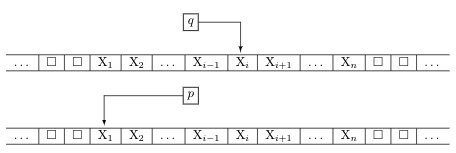

- LIMPAR-L: limpa o trecho de fita entre a posição atual e a posição mais a esquerda da fita.
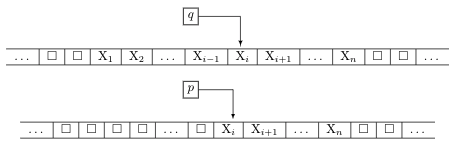

- LIMPAR-R: limpa o trecho de fita após a posição atual e a posição mais a direita da fita.
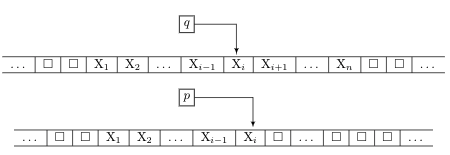

- MAIOR-IGUAL: uma função que recebe $0^m\# 0^n\#$ e retorna: $1\#$, se $m\geq n$; $0\#$, caso contrário. 
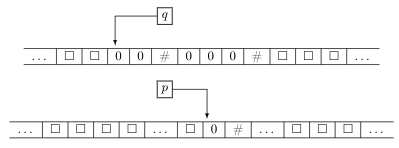

- IF-MAIOR-IGUAL-THEN-ELSE: uma função que recebe $0^m\# 0^n\#0^k\#0^l\#$ e retorna: $0^k\#$, se $m\geq n$; $0^l\#$, caso contrário.
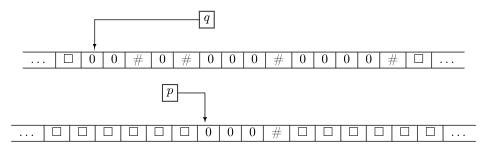


In [ ]:
#@title 1. RESET: desloca a cabeça de leitura para a posição mais a esquerda da fita.
print("1. RESET: desloca a cabeça de leitura para a posição mais a esquerda da fita.")
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=...
F = ...
delta ={...}
M_reset = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_reset.simular_id_inicial('001','111')

In [ ]:
#@title 2. LIMPAR-L: limpa o trecho de fita entre a posição atual e a posição mais a esquerda da fita.
print("2. LIMPAR-L: limpa o trecho de fita entre a posição atual e a posição mais a esquerda da fita.")
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}
M_limpar_l = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_limpar_l.simular_id_inicial('001','111')


In [ ]:
#@title 3. LIMPAR-R: limpa o trecho de fita após a posição atual e a posição mais a direita da fita.
print("3. LIMPAR-R: limpa o trecho de fita após a posição atual e a posição mais a direita da fita.")
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}
M_limpar_r = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_limpar_r.simular_id_inicial('001','111')

In [ ]:
#@title 4. MAIOR-IGUAL: uma função que recebe  0𝑚#0𝑛#  e retorna:  1# , se  𝑚≥𝑛 ;  0# , caso contrário.
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}
MTs = {...}
M_maior_igual = MT(Q,Sigma,Gamma,delta,q0,blank,F,MTs)
M_maior_igual.simular('000#00#',show_other_MTs=False)

In [ ]:
#@title 5. IF-MAIOR-IGUAL-THEN-ELSE: uma função que recebe  0𝑚#0𝑛#0𝑘#0𝑙#  e retorna:  0𝑘# , se  𝑚≥𝑛 ;  0𝑙# , caso contrário.
Q = {...}
Sigma = {...}
Gamma = {...}
q0 = ...
blank=S_BLK #=' ' 
F = {...}
delta ={...}
MTs = {...}
M_if_then_eles = MT(Q,Sigma,Gamma,delta,q0,blank,F,MTs)
M_if_then_eles.simular('000#00#0000#00#',show_other_MTs=False)

<!--NAVIGATION-->
< [Linguagens Regulares](./Cap%C3%ADtulo_02_Linguagens_Regulares_com_Building_Blocks.ipynb) | [Índice](./index.ipynb) | [Funções Recursivas de Kleene](./Cap%C3%ADtulo_04_Fun%C3%A7%C3%B5es_Recursivas_de_Kleene.ipynb) >
